# Sell Optimization
Model training: **Optimal year**. Time series forecasting using LSTM networks
***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from datetime import datetime

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


## Import dataset and create time series
The dataset is the monthly sales data for the product `Televisions` from year 2006 to 2020.   

In [3]:
drive_path = '/content/drive/MyDrive/'
local_path = 'Inframind/Customer retention/Sell optimization/'
df = pd.read_csv(drive_path+local_path+
  "tv_sales.csv", 
  parse_dates=['Month'], 
  index_col="Month"
)

### Drop index 2020 having incomplete data

In [4]:
# drop last column because of incomplete data
df = df[:-1]

## Resample data to yearly series

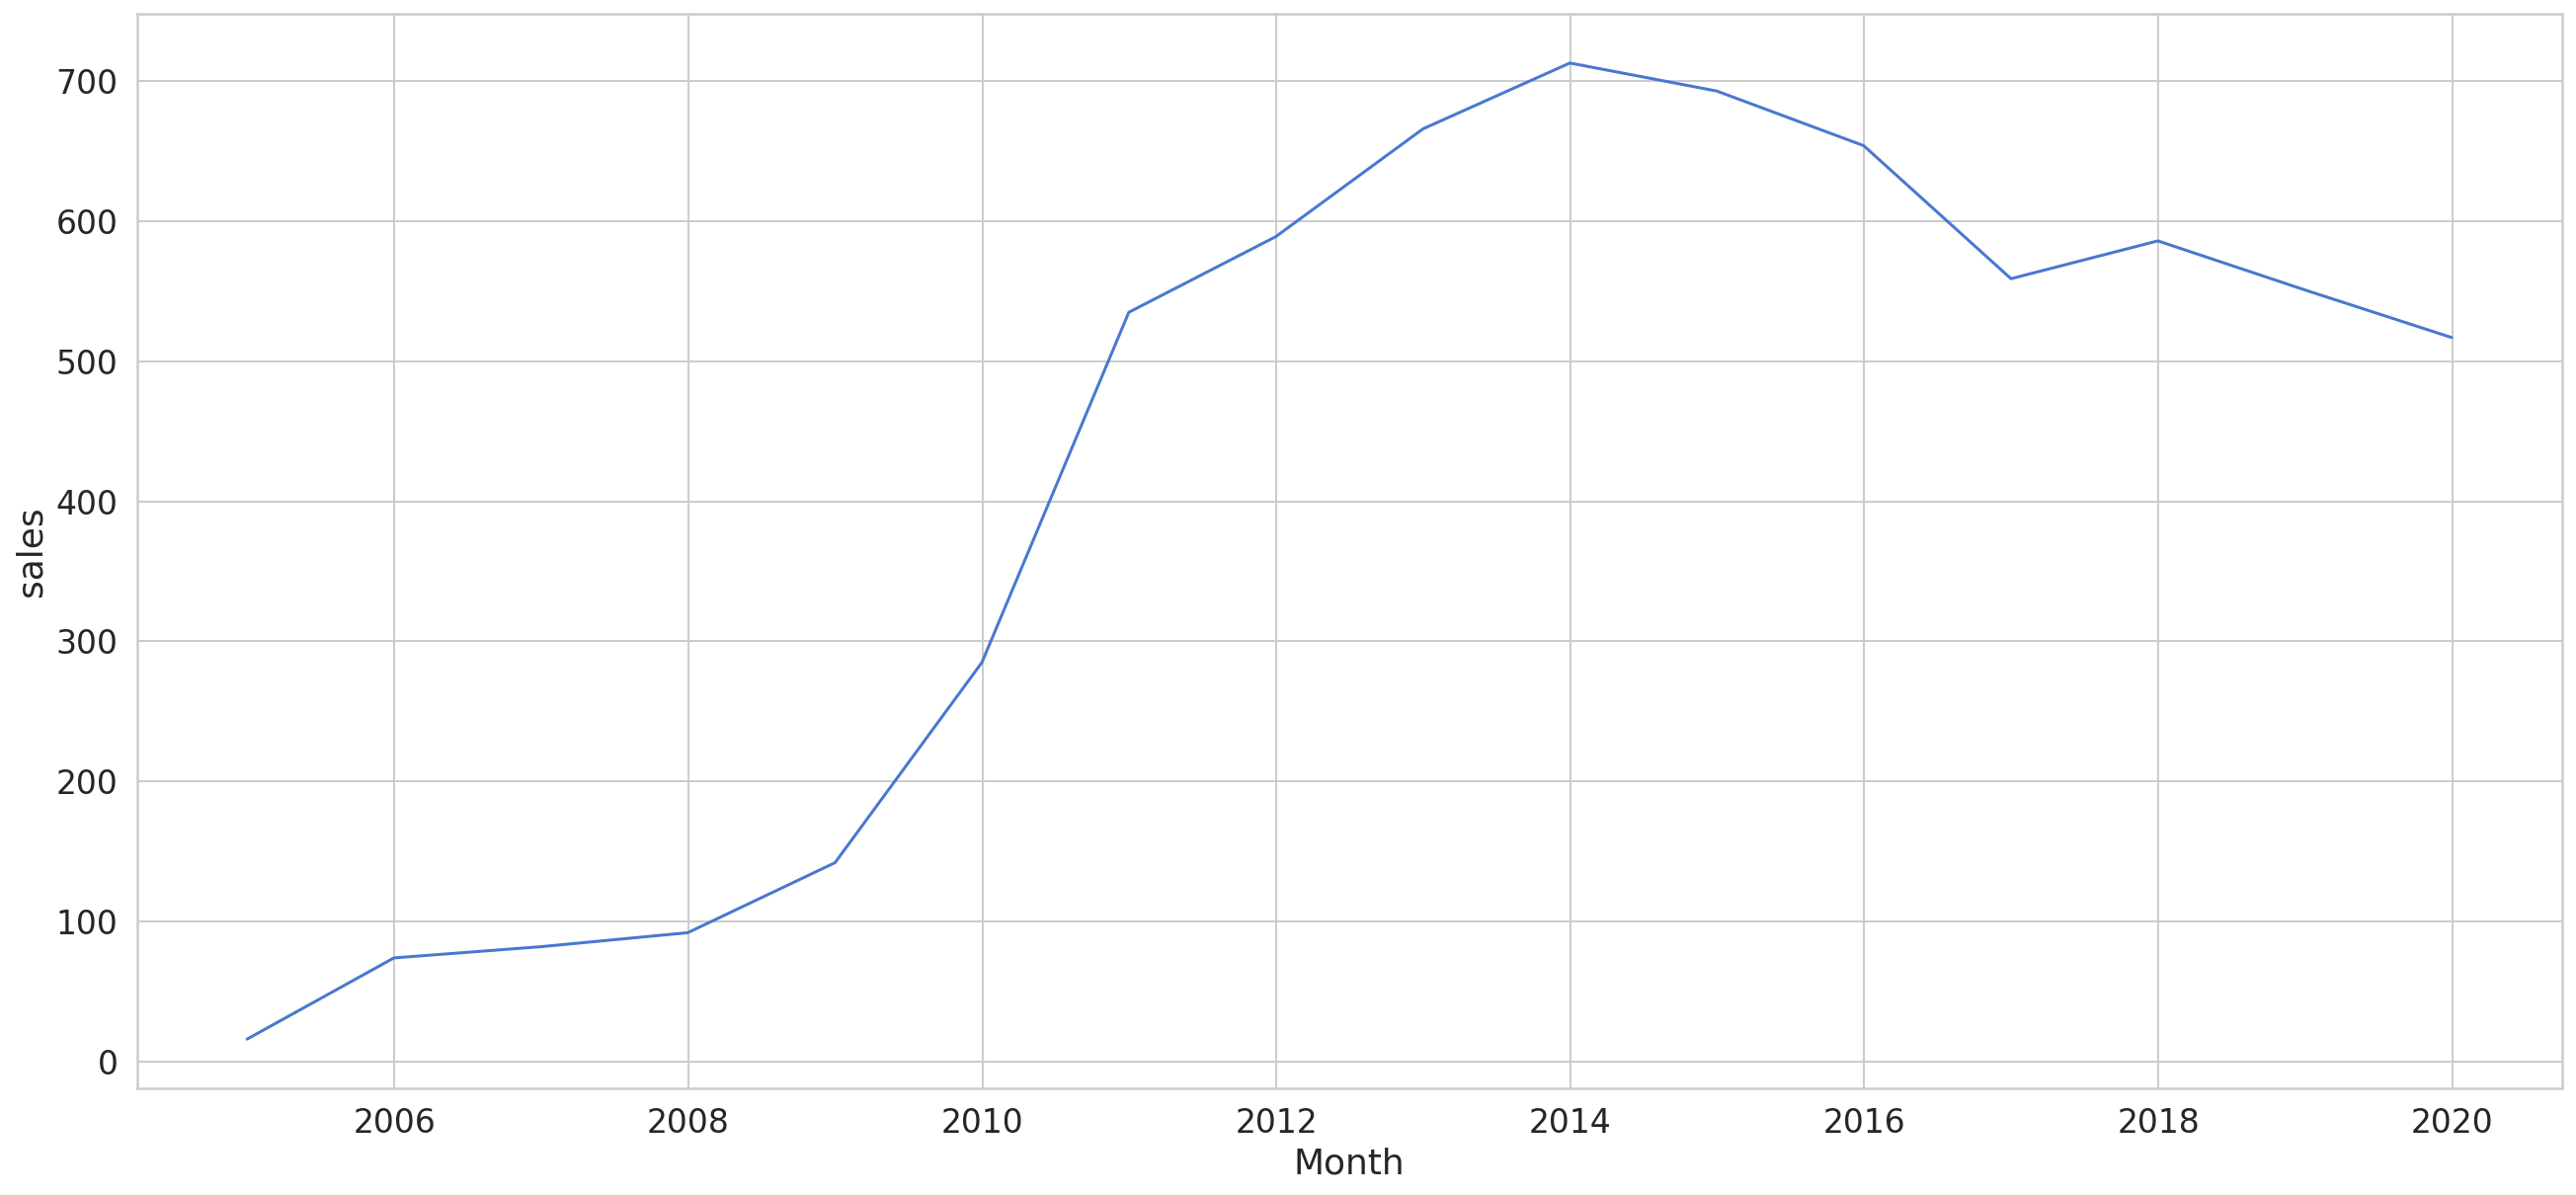

In [5]:
df_by_year = df.resample('Y').sum()

sns.lineplot(x=df_by_year.index, y="sales", data=df_by_year);

df = df_by_year

In [6]:
df.tail()

,sales
Month,
2015-12-31,654
2016-12-31,559
2017-12-31,586
2018-12-31,551
2019-12-31,517


# Preprocessing
***

In [7]:
curr_date = datetime.strptime('2019-12-31', '%Y-%m-%d').date()

average = df.loc[datetime(year = curr_date.year -3, month =12, day = 31) : datetime(year = curr_date.year -1,month = 12, day= 31)].sum()/3
print(float(str(average).split()[1]))
print(average.dtype)

565.333333
float64


## Train test split

In [8]:
split_date = pd.datetime(2016,1,1)
train = df.loc[:split_date]
test = df.loc[split_date:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [9]:
train

,sales
Month,
2004-12-31,16
2005-12-31,74
2006-12-31,82
2007-12-31,92
2008-12-31,142
2009-12-31,285
2010-12-31,535
2011-12-31,589
2012-12-31,666


In [10]:
test

,sales
Month,
2016-12-31,559
2017-12-31,586
2018-12-31,551
2019-12-31,517


## Convert time series to supervised dataset

In [11]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

## Define time steps
The model will use the past 3 years time series data for prediction of the next year. Now, the features of the supervised data are `year_1`, `year_2`, `year_3` and the predictive feature being `year_4`

In [12]:
time_steps = 3

X_train, y_train = create_dataset(train, train.sales, time_steps)
X_test, y_test = create_dataset(test, test.sales, time_steps)

print(X_train.shape, y_train.shape)

(9, 3, 1) (9,)


In [13]:
X_test

array([[[559],
        [586],
        [551]]])

In [14]:
y_test

array([517])

In [15]:
print(X_train),print(y_train)

[[[ 16]
  [ 74]
  [ 82]]

 [[ 74]
  [ 82]
  [ 92]]

 [[ 82]
  [ 92]
  [142]]

 [[ 92]
  [142]
  [285]]

 [[142]
  [285]
  [535]]

 [[285]
  [535]
  [589]]

 [[535]
  [589]
  [666]]

 [[589]
  [666]
  [713]]

 [[666]
  [713]
  [693]]]
[ 92 142 285 535 589 666 713 693 654]


(None, None)

In [16]:
y_train.shape

(9,)

In [17]:
X_train.shape

(9, 3, 1)

In [18]:
n_features = 1
print(X_train.shape)

(9, 3, 1)


## Building the LSTM model

In [19]:
# define the model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(time_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(X_train, y_train, epochs=300, verbose=1)


Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 290512.6250
Epoch 2/300
1/1 [==============================] - 0s 17ms/step - loss: 278342.6562
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 271057.7188
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 264789.9062
Epoch 5/300
1/1 [==============================] - 0s 14ms/step - loss: 257718.4688
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 252503.9688
Epoch 7/300
1/1 [==============================] - 0s 15ms/step - loss: 247327.4688
Epoch 8/300
1/1 [==============================] - 0s 15ms/step - loss: 241278.8281
Epoch 9/300
1/1 [==============================] - 0s 14ms/step - loss: 233458.1875
Epoch 10/300
1/1 [==============================] - 0s 14ms/step - loss: 223151.2656
Epoch 11/300
1/1 [==============================] - 0s 17ms/step - loss: 211733.5625
Epoch 12/300
1/1 [==============================] - 0s 14ms/step - loss: 201

## Export the model

In [20]:
# save model
model.save('/content/drive/MyDrive/Inframind/Customer retention/Sell optimization/models/tv_optimal_year.h5')

## Evaluate prediction for current year

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred

array([[499.64975]], dtype=float32)

In [23]:
y_test

array([517])

In [24]:
y_pred - y_test

array([[-17.35025024]])

## Visualize current year prediction

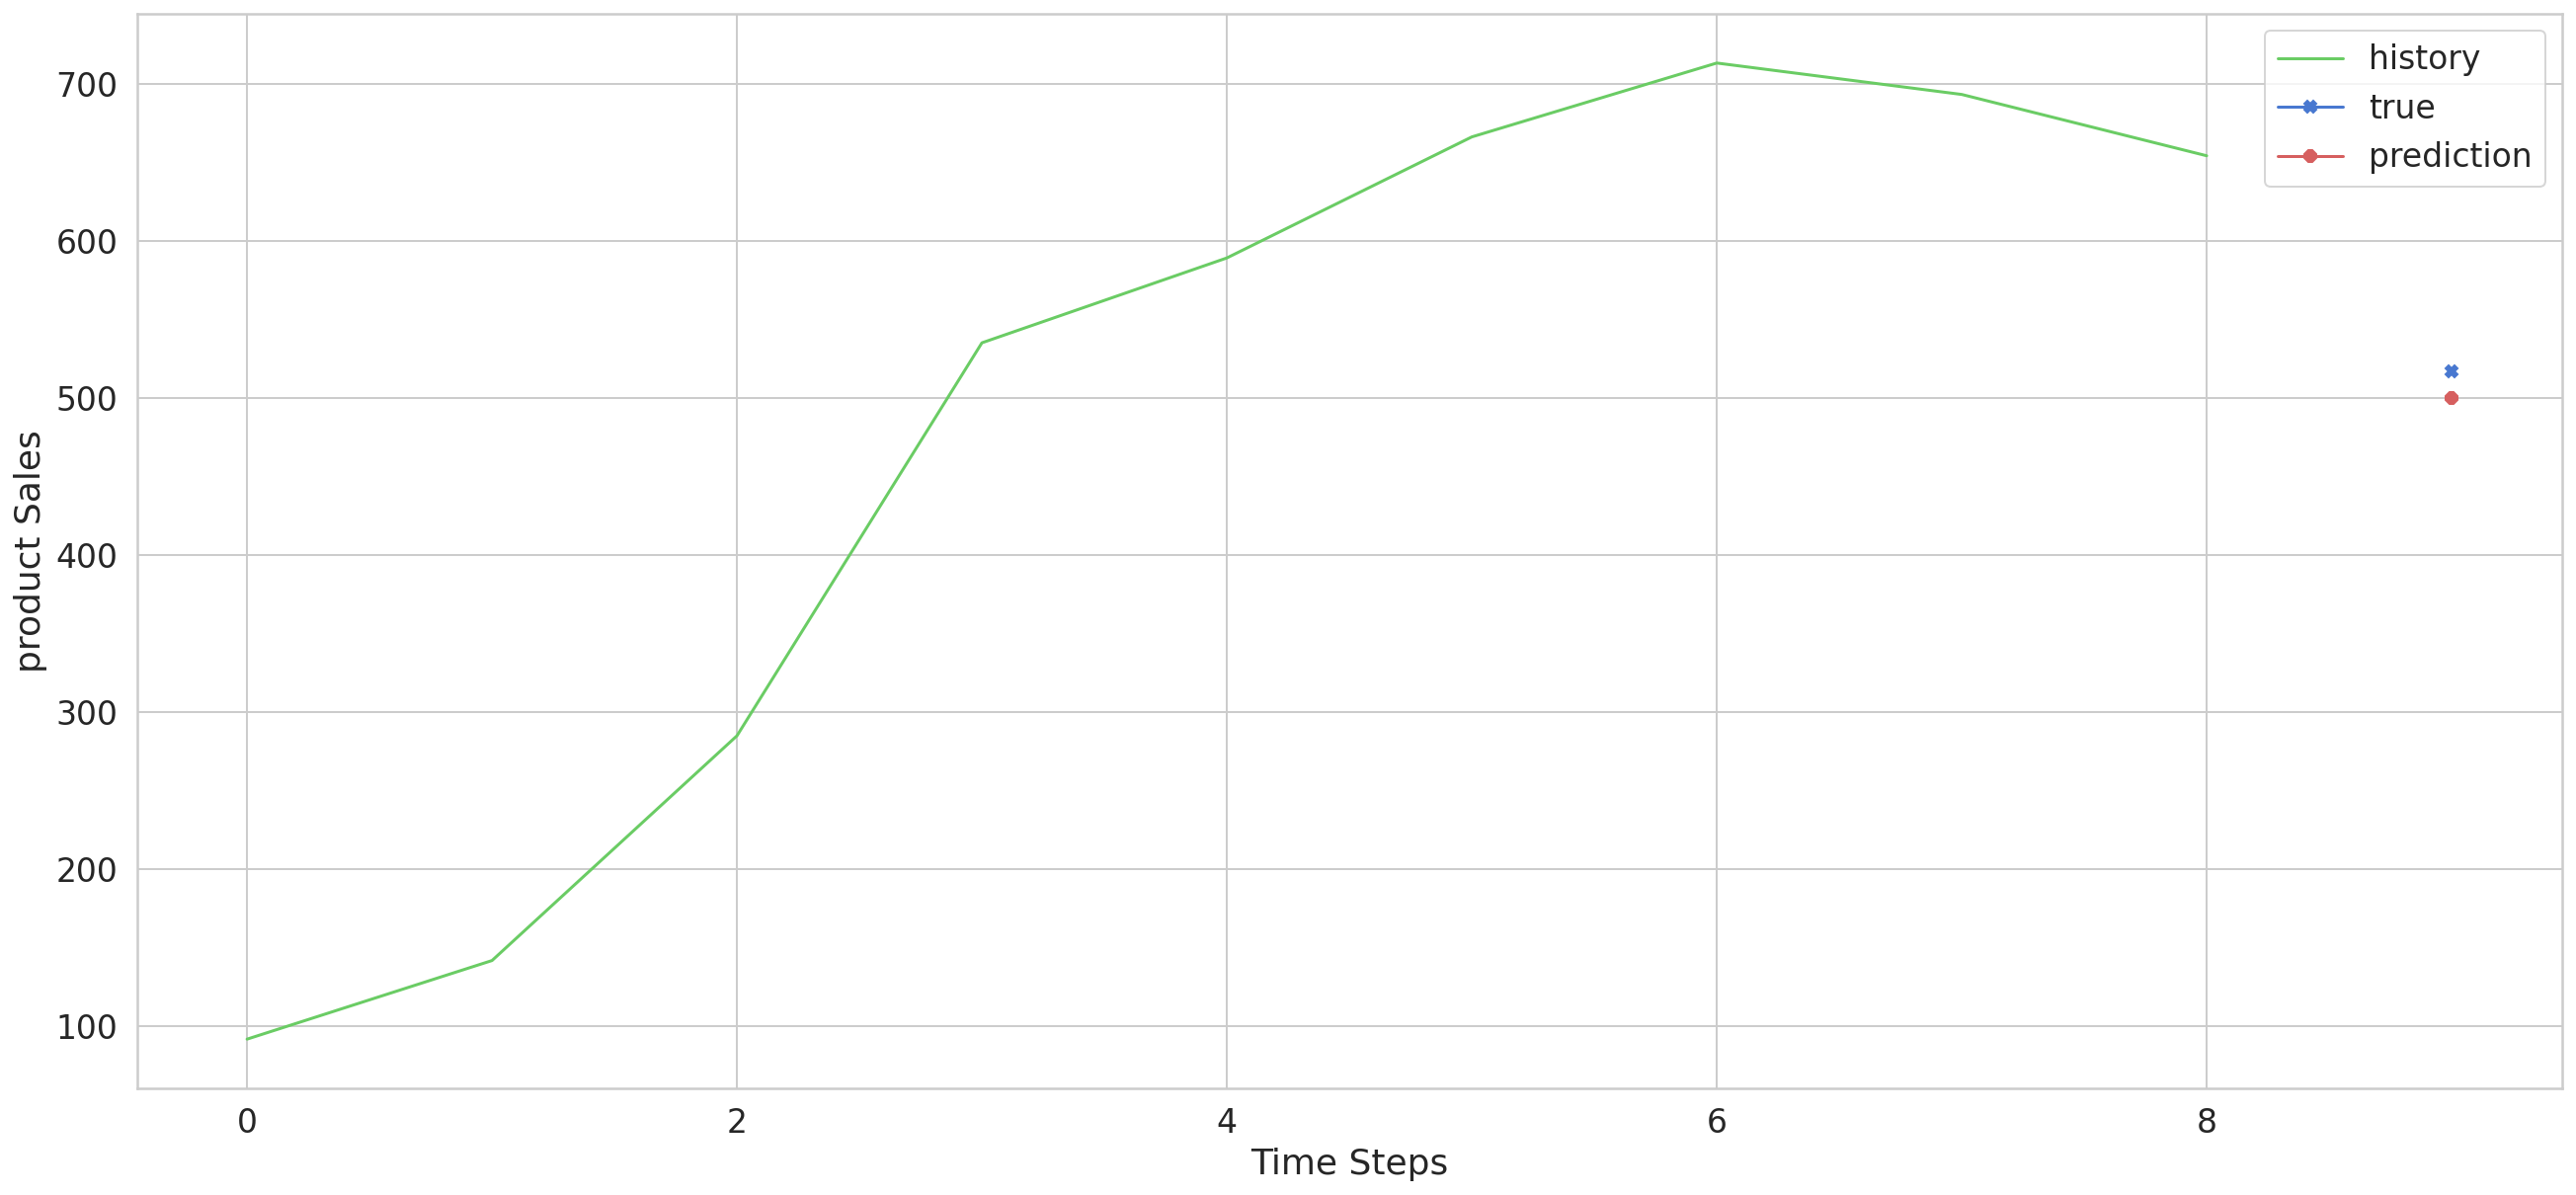

In [25]:
plt.plot(np.arange(0, len(y_train)), y_train.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='X', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='8', label="prediction")
plt.ylabel('product Sales')
plt.xlabel('Time Steps')
plt.legend()
plt.show();

In [26]:
y_test

array([517])

In [27]:
y_pred[0][0]

499.64975